In [27]:
import numpy as np
import pandas as pd

import datetime as dt
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


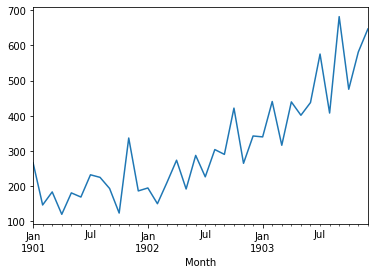

In [28]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

### autocorrelation plot 

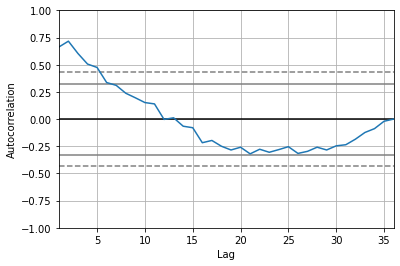

In [29]:
autocorrelation_plot(series)
pyplot.show()

In [30]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Mon, 14 Sep 2020   AIC                            406.340
Time:                        22:34:11   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.001       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


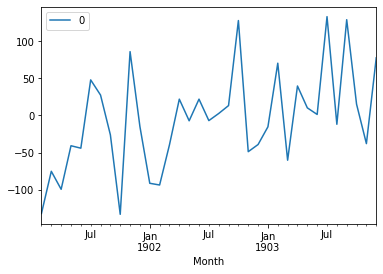

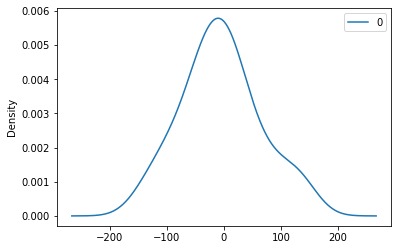

                0
count   35.000000
mean    -5.495178
std     68.132884
min   -133.296572
25%    -42.477848
50%     -7.186537
75%     24.748373
max    133.237999


In [31]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

# Forcasting

In [24]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(output[0])
    print('predicted=%f, expected=%f' % (yhat, obs), '\n')
error = mean_squared_error(test, predictions)

[349.11763851]
predicted=349.117639, expected=342.300000 

[306.51298185]
predicted=306.512982, expected=339.700000 

[387.37641145]
predicted=387.376411, expected=440.400000 

[348.1541818]
predicted=348.154182, expected=315.900000 

[386.30876684]
predicted=386.308767, expected=439.300000 

[356.08205566]
predicted=356.082056, expected=401.300000 

[446.37948777]
predicted=446.379488, expected=437.400000 

[394.73734982]
predicted=394.737350, expected=575.500000 

[434.91543424]
predicted=434.915434, expected=407.600000 

[507.9233762]
predicted=507.923376, expected=682.000000 

[435.48279378]
predicted=435.482794, expected=475.300000 

[652.74383289]
predicted=652.743833, expected=581.300000 

[546.34351849]
predicted=546.343518, expected=646.900000 



Test MSE: 6958.326


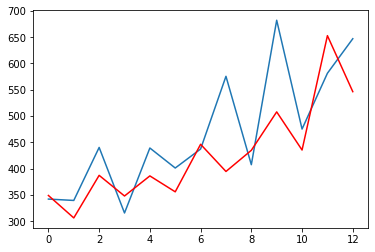

In [25]:
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()